In [52]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from colorama import Fore, Style
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import mutual_info_regression

In [53]:
df = pd.read_csv('EDA_df.csv')

In [54]:
def print_null_values(df):
    null_counts = df.isnull().sum()
    total_rows = len(df)
    null_percentages = (null_counts / total_rows) * 100

    result_df = pd.DataFrame({
        'Column Name': null_counts.index,
        'Null Count': null_counts,
        'Null Percentage': null_percentages
    })

    colored_rows = []
    for i, (_, row) in enumerate(result_df.iterrows()):
        if row['Null Count'] > 0:
            color = Fore.RED
        else:
            color = Fore.WHITE if i % 2 == 0 else Fore.LIGHTWHITE_EX
        colored_row = [
            f"{color}{row['Column Name']}",
            f"{color}{row['Null Count']}",
            f"{color}{row['Null Percentage']:.2f}%",
        ]
        colored_rows.append(colored_row)

    headers = [Fore.CYAN + "Column Name", Fore.CYAN + "Null Count", Fore.CYAN + "Null Percentage"]
    print(tabulate(colored_rows, headers=headers, tablefmt='fancy_grid', numalign='right'))

In [55]:
print_null_values(df)

╒══════════════════════╤══════════════╤═══════════════════╕
│ Column Name          │   Null Count │ Null Percentage   │
╞══════════════════════╪══════════════╪═══════════════════╡
│ Category             │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Field                │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Seller Level         │           36 │ 0.40%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Seller In Same Level │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Basic Price          │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Standard Price       │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Premium Price        │            0 │ 0.00%             │
├──────────────────────┼──────────────┼─

In [56]:
df.dropna(subset=['Country'], inplace=True)
print_null_values(df)

╒══════════════════════╤══════════════╤═══════════════════╕
│ Column Name          │   Null Count │ Null Percentage   │
╞══════════════════════╪══════════════╪═══════════════════╡
│ Category             │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Field                │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Seller Level         │           36 │ 0.40%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Seller In Same Level │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Basic Price          │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Standard Price       │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Premium Price        │            0 │ 0.00%             │
├──────────────────────┼──────────────┼─

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 9000
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              9000 non-null   object 
 1   Field                 9000 non-null   object 
 2   Seller Level          8964 non-null   float64
 3   Seller In Same Level  9000 non-null   int64  
 4   Basic Price           9000 non-null   float64
 5   Standard Price        9000 non-null   float64
 6   Premium Price         9000 non-null   float64
 7   Basic Delivery        9000 non-null   int64  
 8   Standard Delivery     9000 non-null   int64  
 9   Premium Delivery      9000 non-null   int64  
 10  Basic Revision        9000 non-null   int64  
 11  Standard Revision     9000 non-null   int64  
 12  Premium Revision      9000 non-null   int64  
 13  Rating                8784 non-null   float64
 14  Rating Count          9000 non-null   float64
 15  Country               9000

In [58]:
def encode_and_save_mappings(df, file_name='column_mappings.txt'):

    df_encoded = df.copy()
    mappings = []

    with open(file_name, 'w') as f:
        for column in df_encoded.select_dtypes(include=['object', 'category']).columns:
            le = LabelEncoder()

            non_null_values = df_encoded[column].dropna()
            le.fit(non_null_values)

            df_encoded[column] = df_encoded[column].apply(lambda x: le.transform([x])[0] if pd.notnull(x) else x)

            mapping = {original: encoded for original, encoded in zip(le.classes_, le.transform(le.classes_))}
            mappings.append({column: mapping})

            f.write(f"Column: {column}\n")
            for original, encoded in mapping.items():
                f.write(f"{original} -> {encoded}\n")
            f.write("\n")

    for mapping in mappings:
        for column, mapping_values in mapping.items():
            print(f"Column: {column}")
            for original, encoded in mapping_values.items():
                print(f"{original} -> {encoded}")
            print()

    return df_encoded

In [59]:
df['Member Since'] = pd.to_datetime(df['Member Since'])
df['Member Since'] = (datetime.now() - df['Member Since']).dt.days

In [60]:
print_null_values(df)

╒══════════════════════╤══════════════╤═══════════════════╕
│ Column Name          │   Null Count │ Null Percentage   │
╞══════════════════════╪══════════════╪═══════════════════╡
│ Category             │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Field                │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Seller Level         │           36 │ 0.40%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Seller In Same Level │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Basic Price          │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Standard Price       │            0 │ 0.00%             │
├──────────────────────┼──────────────┼───────────────────┤
│ Premium Price        │            0 │ 0.00%             │
├──────────────────────┼──────────────┼─

In [61]:
languages = ['Arabic' , 'Bengali', 'Chinese', 'Dutch', 'English', 'French', 'German', 'Hindi', 'Indonesian', 'Italian', 'Portuguese', \
           'Punjabi', 'Russian', 'Spanish', 'Turkish', 'Ukrainian', 'Urdu']

In [62]:
df['Spoken Languages Count'] = df[languages].sum(axis=1)

In [63]:
print_null_values(df)

╒════════════════════════╤══════════════╤═══════════════════╕
│ Column Name            │   Null Count │ Null Percentage   │
╞════════════════════════╪══════════════╪═══════════════════╡
│ Category               │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Field                  │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Seller Level           │           36 │ 0.40%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Seller In Same Level   │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Basic Price            │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Standard Price         │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Premium Price          │            0 │ 0.00%             │
├───────

In [64]:
df_labeled = encode_and_save_mappings(df)

Column: Category
Business -> 0
Data -> 1
Digital Marketing -> 2
Graphics & Design -> 3
Lifestyle -> 4
Music & Audio -> 5
Photography -> 6
Programming & Tech -> 7
Video & Animation -> 8
Writing & Translation -> 9

Column: Field
3d-product-animation -> 0
animated-explainer-videos -> 1
articles-blogposts -> 2
book-editing -> 3
business-plans -> 4
chatbots -> 5
data-analactics -> 6
data-engineering -> 7
data-mining -> 8
data-processing -> 9
data-science -> 10
databases -> 11
digital-illustration -> 12
dj-mixing -> 13
event-photographers -> 14
fashion-design -> 15
financial-consulting-services -> 16
fitness -> 17
food-photographers -> 18
game-art -> 19
game-development -> 20
influencer-marketing -> 21
legal-consulting-services -> 22
life-coaching -> 23
lifestyle-fashion-photographers -> 24
logo-animation-services -> 25
market-research-reports -> 26
mixing-mastering -> 27
mobile-app-services -> 28
modeling-acting -> 29
nft -> 30
online-tutoring -> 31
online-video-marketing -> 32
personal-sty

In [65]:
def impute_with_random_forest(df, columns_to_impute):

    df_imputed = df.copy()
    imputer = SimpleImputer(strategy='most_frequent')  # or 'median', 'most_frequent', etc., depending on your data

    for target_column in columns_to_impute:
        if df_imputed[target_column].isnull().sum() == 0:
            continue

        df_not_missing = df_imputed.dropna(subset=[target_column])
        df_missing = df_imputed[df_imputed[target_column].isnull()]

        X = df_not_missing.drop(columns=[target_column])
        y = df_not_missing[target_column]

        X_imputed = imputer.fit_transform(X)

        if y.dtype == 'object' or y.dtype.name == 'category':
            model = RandomForestClassifier()
        else:
            model = RandomForestRegressor()

        model.fit(X_imputed, y)

        X_missing = df_missing.drop(columns=[target_column])

        X_missing_imputed = imputer.transform(X_missing)
        y_pred = model.predict(X_missing_imputed)

        df_imputed.loc[df_imputed[target_column].isnull(), target_column] = y_pred

    return df_imputed

In [66]:
def KNN_imputer(df, k=5):
    knn_imputer = KNNImputer(n_neighbors=k)
    imputed_array = knn_imputer.fit_transform(df)
    imputed_df = pd.DataFrame(imputed_array, columns=df.columns)
    return imputed_df

In [67]:
columns_to_impute = ['Rating', 'Member Since', 'Avg Response Time', 'Last Delivery', 'Seller Level']
df_imputed = impute_with_random_forest(df_labeled, columns_to_impute)

In [68]:
print_null_values(df_imputed)

╒════════════════════════╤══════════════╤═══════════════════╕
│ Column Name            │   Null Count │ Null Percentage   │
╞════════════════════════╪══════════════╪═══════════════════╡
│ Category               │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Field                  │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Seller Level           │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Seller In Same Level   │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Basic Price            │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Standard Price         │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Premium Price          │            0 │ 0.00%             │
├───────

In [69]:
df_knn_imputed = KNN_imputer(df_labeled, 10)

In [70]:
print_null_values(df_knn_imputed)

╒════════════════════════╤══════════════╤═══════════════════╕
│ Column Name            │   Null Count │ Null Percentage   │
╞════════════════════════╪══════════════╪═══════════════════╡
│ Category               │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Field                  │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Seller Level           │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Seller In Same Level   │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Basic Price            │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Standard Price         │            0 │ 0.00%             │
├────────────────────────┼──────────────┼───────────────────┤
│ Premium Price          │            0 │ 0.00%             │
├───────

In [71]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 9000
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                9000 non-null   int32  
 1   Field                   9000 non-null   int32  
 2   Seller Level            9000 non-null   float64
 3   Seller In Same Level    9000 non-null   int64  
 4   Basic Price             9000 non-null   float64
 5   Standard Price          9000 non-null   float64
 6   Premium Price           9000 non-null   float64
 7   Basic Delivery          9000 non-null   int64  
 8   Standard Delivery       9000 non-null   int64  
 9   Premium Delivery        9000 non-null   int64  
 10  Basic Revision          9000 non-null   int64  
 11  Standard Revision       9000 non-null   int64  
 12  Premium Revision        9000 non-null   int64  
 13  Rating                  9000 non-null   float64
 14  Rating Count            9000 non-null   float

In [74]:
def calculate_mutual_information(df, target_column):
    independent_vars = df.columns.difference([target_column]).tolist()
    mi_values = [mutual_info_regression(df[[col]], df[target_column])[0] for col in independent_vars]

    max_mi = max(mi_values)
    normalized_mi = [mi / max_mi for mi in mi_values]

    mi_df = pd.DataFrame(normalized_mi, index=independent_vars, columns=[target_column])

    return mi_df

In [75]:
result_df = calculate_mutual_information(df_imputed, target_column='Standard Price')
print(result_df)

                        Standard Price
Arabic                        0.004263
Avg Response Time             0.019501
Basic Delivery                0.093950
Basic Price                   0.725496
Basic Revision                0.015081
Bengali                       0.003082
Category                      0.076322
Chinese                       0.000000
Country                       0.038303
Dutch                         0.000000
English                       0.000000
Field                         0.166473
French                        0.003969
German                        0.000000
Hindi                         0.000000
Indonesian                    0.001611
Italian                       0.003688
Last Delivery                 0.030635
Member Since                  0.039332
Order in Queue                0.011309
Polish                        0.000000
Portuguese                    0.000000
Premium Delivery              0.138636
Premium Price                 1.000000
Premium Revision         

In [73]:
result_df = calculate_mutual_information(df_imputed, target_column='Rating Count')
print(result_df)

                        Rating Count
Arabic                      0.000000
Avg Response Time           0.213791
Basic Delivery              0.089543
Basic Price                 0.175553
Basic Revision              0.122240
Bengali                     0.020306
Category                    0.499649
Chinese                     0.000000
Country                     0.214755
Dutch                       0.025171
English                     0.000000
Field                       0.930376
French                      0.044880
German                      0.015023
Hindi                       0.000000
Indonesian                  0.022613
Italian                     0.024405
Last Delivery               0.829015
Member Since                0.664391
Order in Queue              0.597282
Polish                      0.000000
Portuguese                  0.007492
Premium Delivery            0.050237
Premium Price               0.112730
Premium Revision            0.028660
Punjabi                     0.008265
R

In [152]:
# df_imputed['avg_income'] = df_imputed['Standard Price'] * df_imputed['Rating Count']
# df_imputed['avg_work_time'] = df_imputed['Standard Delivery'] * df_imputed['Rating Count']

In [153]:
# df_knn_imputed['avg_income'] = df_knn_imputed['Standard Price'] * df_knn_imputed['Rating Count']
# df_knn_imputed['avg_work_time'] = df_knn_imputed['Standard Delivery'] * df_knn_imputed['Rating Count']

In [161]:
def detect_outliers(df, n_estimators, contamination, random_state):
    print (f'in outlier detection n_estimators is {n_estimators} and the contamination is {contamination}')
    df_copy = df.copy()

    iso = IsolationForest(n_estimators=n_estimators, contamination=contamination ,random_state=random_state)

    outlier_label = iso.fit_predict(df_copy)

    df_copy['outlier'] = outlier_label

    df_outliers = df_copy[df_copy['outlier'] == -1]

    df_copy = df_copy[df_copy['outlier'] == 1]
    df_copy.drop('outlier', axis=1, inplace=True)

    return df_copy, df_outliers

In [166]:
df_no_outlier , _ = detect_outliers(df_imputed, 100, 0.10, 10)
df_knn_no_outlier , _ = detect_outliers(df_knn_imputed, 100, 0.10, 10)

in outlier detection n_estimators is 100 and the contamination is 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


in outlier detection n_estimators is 100 and the contamination is 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [154]:
def normalize_features(df):
    df_copy = df.copy()

    scaler = StandardScaler()

    df_normalized = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)

    return df_normalized

In [167]:
df_normalized = normalize_features(df_no_outlier)
df_knn_normalized = normalize_features(df_knn_no_outlier)

In [156]:
def plot_correlation_heatmap(df, exclude_columns=None):
    numeric_cols = df.select_dtypes(include=['number'])

    if exclude_columns:
        numeric_cols = numeric_cols.drop(columns=exclude_columns)

    corr_matrix = numeric_cols.corr()

    plt.figure(figsize=(24, 16))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

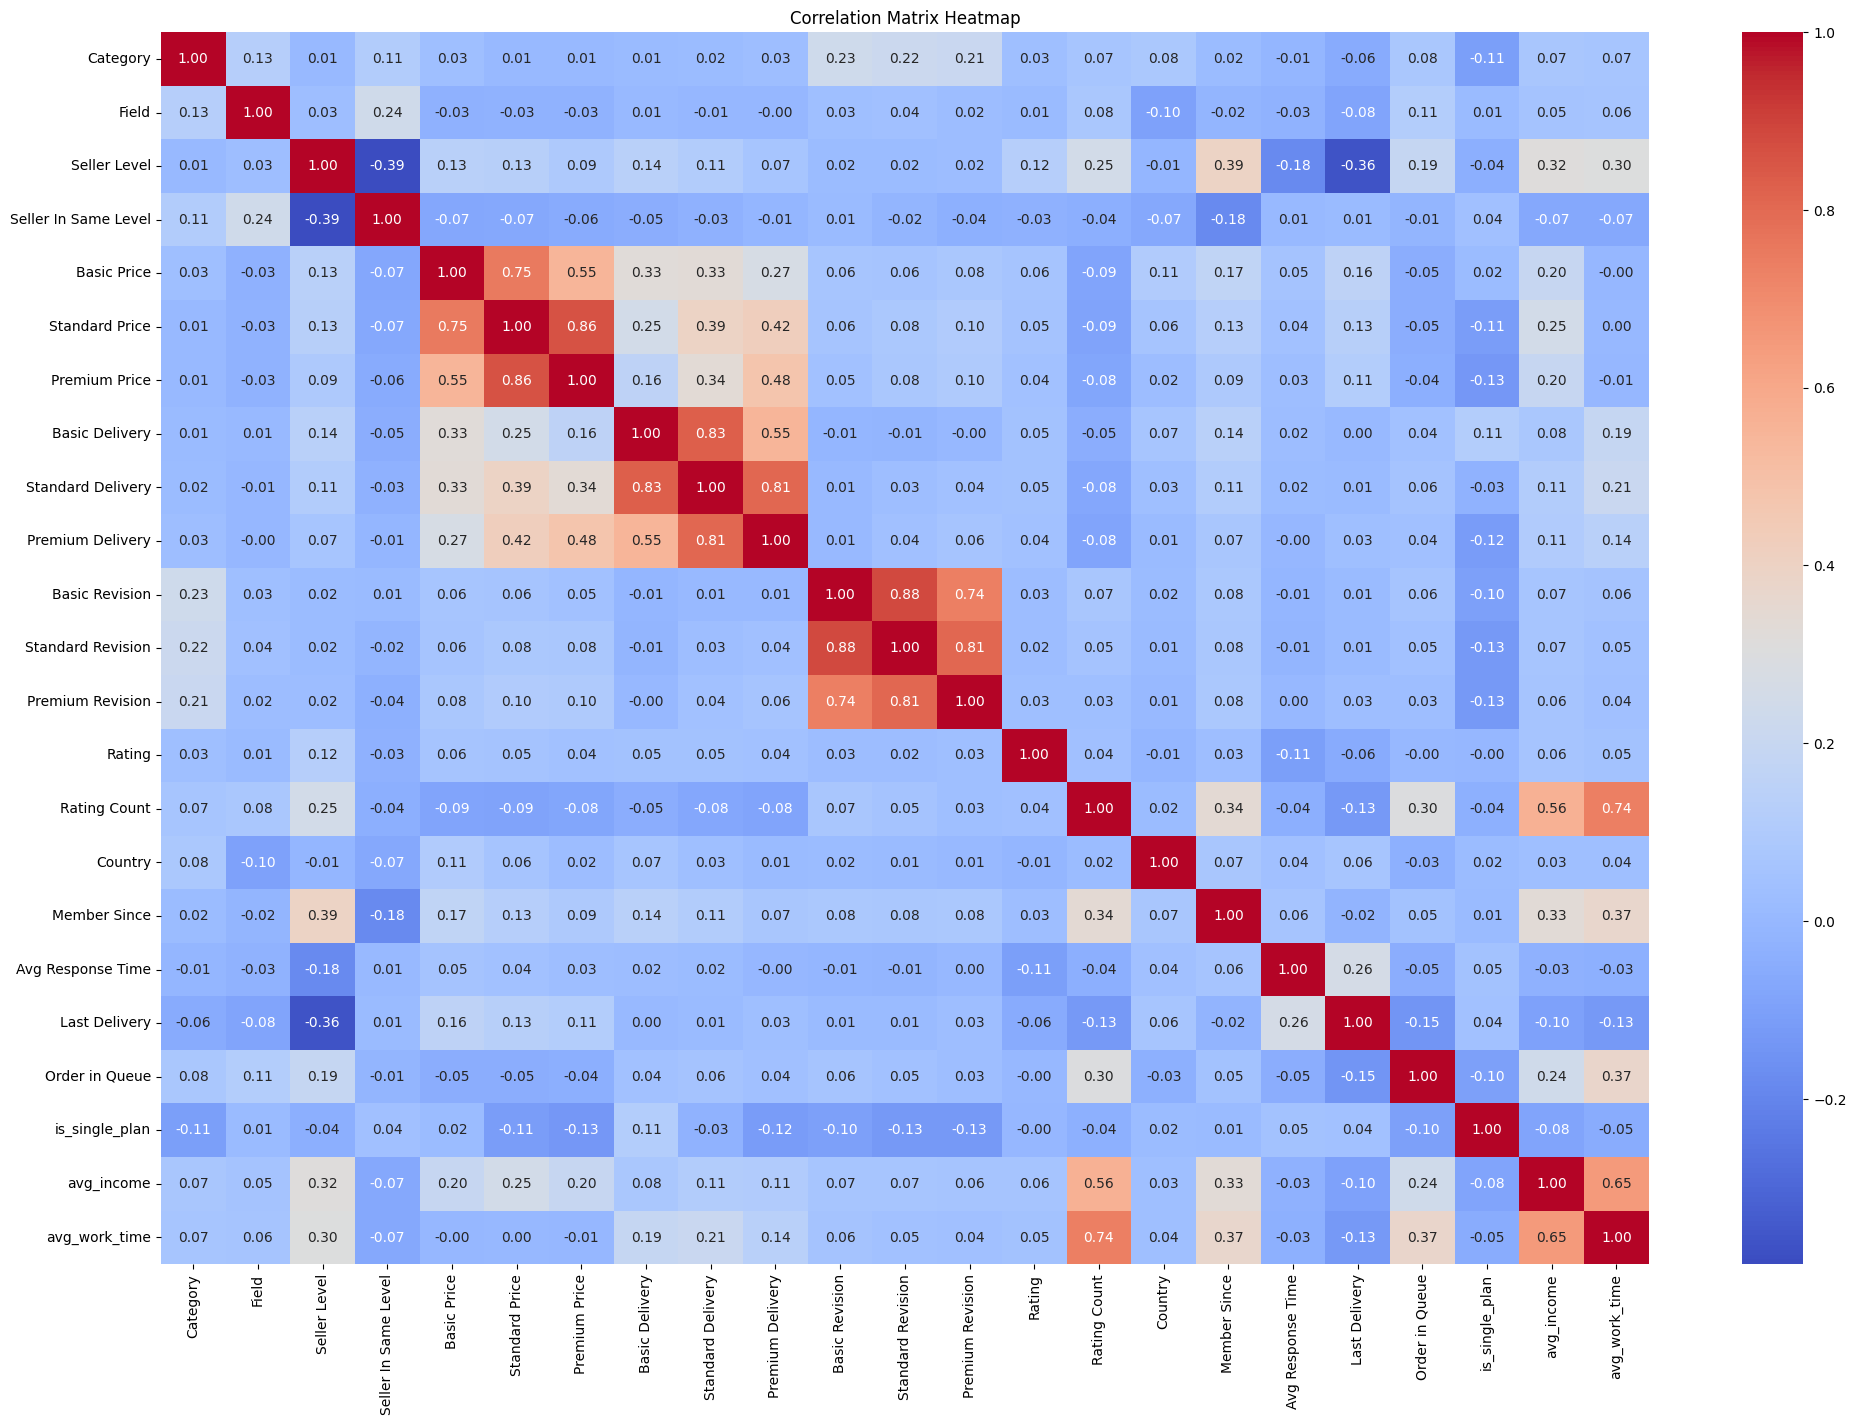

In [168]:
plot_correlation_heatmap(df_normalized, languages)

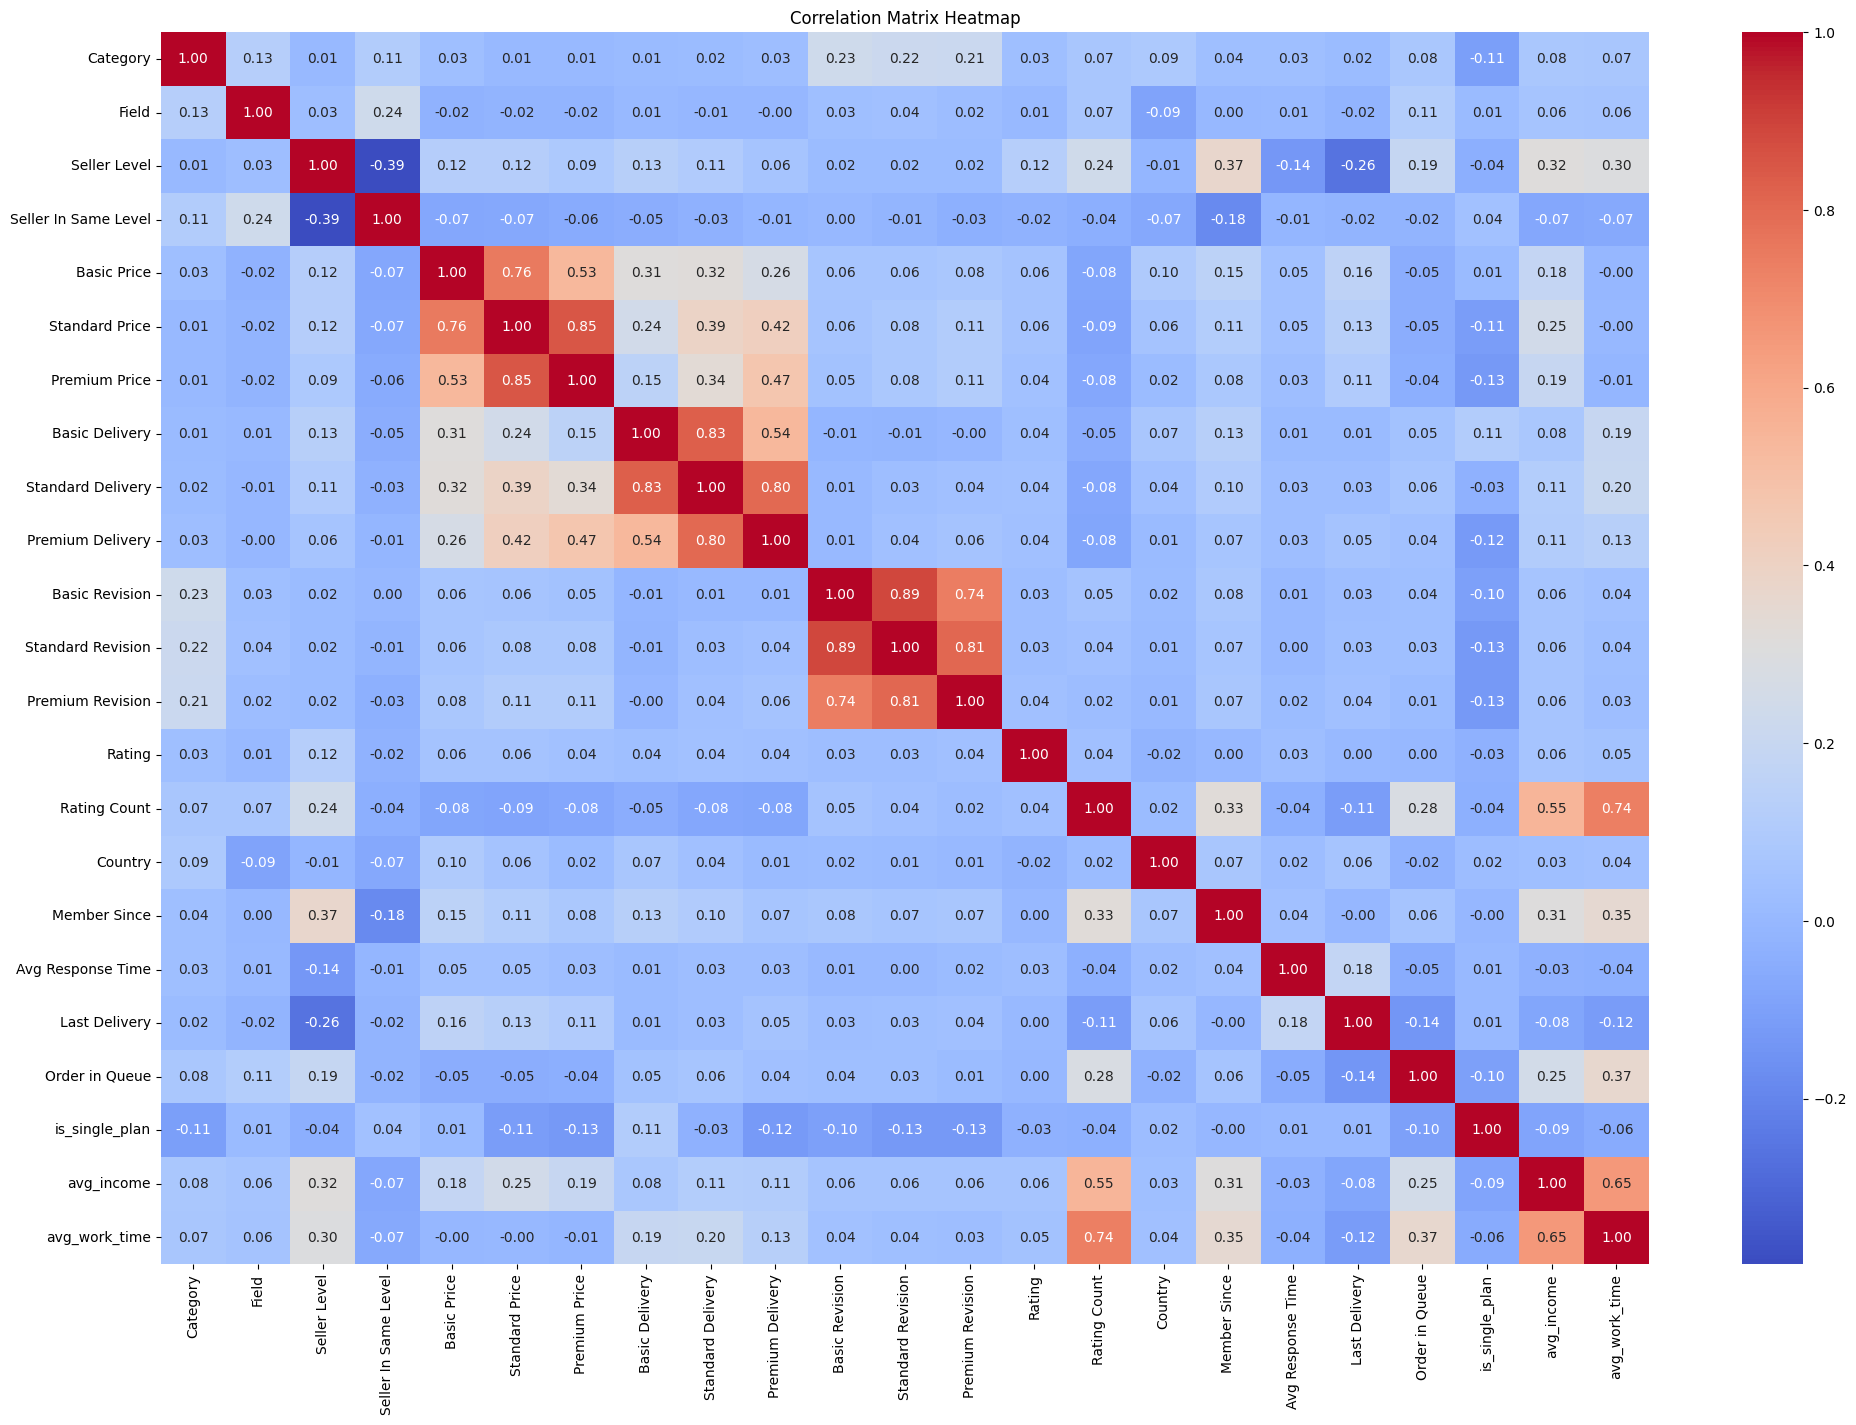

In [169]:
plot_correlation_heatmap(df_knn_normalized, languages)

In [173]:
def apply_pca(df, variance_ratio, random_state):
    print(f'in pca the variance ratio is {variance_ratio}')
    df_copy = df.copy()

    pca = PCA(n_components=variance_ratio, random_state=random_state)

    df_pca = pd.DataFrame(pca.fit_transform(df_copy))

    if (variance_ratio < 1):
        print (f'pca dimontions after pca : {df_pca.shape[1]}')
    else:
        print(f'Total explained variance: {sum(pca.explained_variance_ratio_)}')

    return df_pca

In [175]:
print(df_normalized.shape)

(5329, 41)


## Dropping columns with zero mutual information

In [ ]:
rating_count_target_df = df_normalized.drop(columns=['Arabic', 'Chinese', 'English', 'Hindi', 'Polish', 'Russian', 'Turkish', 'Ukrainian', 'Urdu'])
std_price_target_df = df_normalized.drop(columns=['Chinese', 'English', 'Hindi', 'Polish', 'Turkish', 'Spoken Languages Count', 'Ukrainian', 'Punjabi', 'Portuguese', 'Dutch', 'German'])

In [174]:
df_pca_2d = apply_pca(df_normalized, 2, 10)
df_pca_95 = apply_pca(df_normalized, 0.95, 10)
df_knn_pca_2d = apply_pca(df_knn_normalized, 2, 10)
df_knn_pca_95 = apply_pca(df_knn_normalized, 0.95, 10)


in pca the variance ratio is 2
Total explained variance: 0.1669432146308295
in pca the variance ratio is 0.95
pca dimontions after pca : 33
in pca the variance ratio is 2
Total explained variance: 0.16422553895851866
in pca the variance ratio is 0.95
pca dimontions after pca : 33


In [186]:
from sklearn.model_selection import GridSearchCV

def train_linear_regression(X_train, y_train):

    lr_model = LinearRegression()

    param_grid = {
        'fit_intercept': [True, False],
    }


    grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_lr_model = grid_search.best_estimator_
    print(f'best mse was : {- grid_search.best_score_}')

    return best_lr_model , grid_search.best_params_

In [181]:
X = df_normalized.drop(columns=['avg_income'])
y = df_normalized['avg_income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [188]:
from sklearn.metrics import r2_score

best_model , best_params = train_linear_regression(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")

best mse was : 0.5597737266868859
R² score: 0.5459


In [199]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

def train_knn_regression(X_train, y_train):

    knn_regressor = KNeighborsRegressor()

    param_grid = {
        'n_neighbors': [10,11,12,13,14],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_knn_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f'Best score: {- grid_search.best_score_:.4f}')
    print(f'Best hyperparameters: {best_params}')

    return best_knn_model

In [200]:
knn_model = train_knn_regression(X_train, y_train)
y_pred = knn_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")

Best score: 0.5328
Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'distance'}
R² score: 0.4830


In [204]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def train_and_evaluate_nn(X_train, y_train, X_val, y_val, num_epochs=200, batch_size=32):

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val))

    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_pred)
    print(f"Validation MSE: {val_mse:.4f}")
    print(f"Validation R2: {r2:.4f}")

    return model


In [206]:
trained_model = train_and_evaluate_nn(X_train, y_train, X_test, y_test)

Epoch 1/200
134/134 [==============================] - 1s 4ms/step - loss: 0.5532 - val_loss: 0.2349
Epoch 2/200
134/134 [==============================] - 0s 2ms/step - loss: 0.3985 - val_loss: 0.1518
Epoch 3/200
134/134 [==============================] - 1s 7ms/step - loss: 0.2683 - val_loss: 0.1272
Epoch 4/200
134/134 [==============================] - 0s 3ms/step - loss: 0.2423 - val_loss: 0.1297
Epoch 5/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1856 - val_loss: 0.0812
Epoch 6/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1316 - val_loss: 0.0770
Epoch 7/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1227 - val_loss: 0.1028
Epoch 8/200
134/134 [==============================] - 0s 4ms/step - loss: 0.1040 - val_loss: 0.0597
Epoch 9/200
134/134 [==============================] - 0s 3ms/step - loss: 0.0901 - val_loss: 0.0673
Epoch 10/200
134/134 [==============================] - 1s 4ms/step - loss: 0.0962 - val_lo

In [208]:
X = df_normalized.drop(columns=['Premium Price'])
y = df_normalized['Premium Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [209]:
best_model , best_params = train_linear_regression(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")

best mse was : 0.2153936811471496
R² score: 0.7139


In [210]:
knn_model = train_knn_regression(X_train, y_train)
y_pred = knn_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")

Best score: 0.3720
Best hyperparameters: {'algorithm': 'kd_tree', 'n_neighbors': 10, 'weights': 'distance'}
R² score: 0.5456


In [211]:
trained_model = train_and_evaluate_nn(X_train, y_train, X_test, y_test)

Epoch 1/200
134/134 [==============================] - 1s 4ms/step - loss: 0.3916 - val_loss: 0.2720
Epoch 2/200
134/134 [==============================] - 0s 3ms/step - loss: 0.2202 - val_loss: 0.2767
Epoch 3/200
134/134 [==============================] - 0s 3ms/step - loss: 0.2014 - val_loss: 0.2507
Epoch 4/200
134/134 [==============================] - 0s 3ms/step - loss: 0.1974 - val_loss: 0.2330
Epoch 5/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1695 - val_loss: 0.2297
Epoch 6/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1593 - val_loss: 0.2305
Epoch 7/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1434 - val_loss: 0.2286
Epoch 8/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1387 - val_loss: 0.2408
Epoch 9/200
134/134 [==============================] - 0s 3ms/step - loss: 0.1290 - val_loss: 0.2237
Epoch 10/200
134/134 [==============================] - 0s 3ms/step - loss: 0.1146 - val_lo

In [212]:
X = df_normalized.drop(columns=['Standard Price'])
y = df_normalized['Standard Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [213]:
best_model , best_params = train_linear_regression(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")

best mse was : 0.15306566501330976
R² score: 0.8152


In [214]:
knn_model = train_knn_regression(X_train, y_train)
y_pred = knn_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")

Best score: 0.3049
Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
R² score: 0.6403


In [215]:
trained_model = train_and_evaluate_nn(X_train, y_train, X_test, y_test)

Epoch 1/200
134/134 [==============================] - 2s 6ms/step - loss: 0.2509 - val_loss: 0.1459
Epoch 2/200
134/134 [==============================] - 1s 4ms/step - loss: 0.1490 - val_loss: 0.1217
Epoch 3/200
134/134 [==============================] - 1s 6ms/step - loss: 0.1163 - val_loss: 0.1391
Epoch 4/200
134/134 [==============================] - 1s 6ms/step - loss: 0.1084 - val_loss: 0.1445
Epoch 5/200
134/134 [==============================] - 1s 6ms/step - loss: 0.0925 - val_loss: 0.1129
Epoch 6/200
134/134 [==============================] - 1s 6ms/step - loss: 0.0957 - val_loss: 0.1058
Epoch 7/200
134/134 [==============================] - 1s 7ms/step - loss: 0.0790 - val_loss: 0.0939
Epoch 8/200
134/134 [==============================] - 1s 8ms/step - loss: 0.0689 - val_loss: 0.1117
Epoch 9/200
134/134 [==============================] - 1s 5ms/step - loss: 0.0696 - val_loss: 0.0968
Epoch 10/200
134/134 [==============================] - 1s 6ms/step - loss: 0.0711 - val_lo

In [216]:
X = df_normalized.drop(columns=['Basic Price'])
y = df_normalized['Basic Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [217]:
best_model , best_params = train_linear_regression(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")

best mse was : 0.39747512368779664
R² score: 0.6124


In [218]:
knn_model = train_knn_regression(X_train, y_train)
y_pred = knn_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")

Best score: 0.4839
Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
R² score: 0.5364


In [219]:
trained_model = train_and_evaluate_nn(X_train, y_train, X_test, y_test)

Epoch 1/200
134/134 [==============================] - 2s 5ms/step - loss: 0.4898 - val_loss: 0.2645
Epoch 2/200
134/134 [==============================] - 0s 2ms/step - loss: 0.2975 - val_loss: 0.2821
Epoch 3/200
134/134 [==============================] - 0s 2ms/step - loss: 0.2685 - val_loss: 0.2732
Epoch 4/200
134/134 [==============================] - 0s 2ms/step - loss: 0.2401 - val_loss: 0.2478
Epoch 5/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1865 - val_loss: 0.2981
Epoch 6/200
134/134 [==============================] - 0s 3ms/step - loss: 0.1674 - val_loss: 0.2619
Epoch 7/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1721 - val_loss: 0.2476
Epoch 8/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.2670
Epoch 9/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1335 - val_loss: 0.2810
Epoch 10/200
134/134 [==============================] - 0s 2ms/step - loss: 0.1051 - val_lo

In [220]:
X = df_normalized.drop(columns=['Order in Queue'])
y = df_normalized['Order in Queue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [221]:
best_model , best_params = train_linear_regression(X_train, y_train)
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")

best mse was : 0.8335777963267723
R² score: 0.1755


In [222]:
knn_model = train_knn_regression(X_train, y_train)
y_pred = knn_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.4f}")

Best score: 0.8380
Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 12, 'weights': 'distance'}
R² score: 0.1590


In [223]:
trained_model = train_and_evaluate_nn(X_train, y_train, X_test, y_test)

Epoch 1/200
134/134 [==============================] - 1s 4ms/step - loss: 0.8455 - val_loss: 0.8727
Epoch 2/200
134/134 [==============================] - 0s 3ms/step - loss: 0.7362 - val_loss: 0.7832
Epoch 3/200
134/134 [==============================] - 0s 2ms/step - loss: 0.6697 - val_loss: 0.7847
Epoch 4/200
134/134 [==============================] - 0s 2ms/step - loss: 0.6219 - val_loss: 0.7647
Epoch 5/200
134/134 [==============================] - 0s 3ms/step - loss: 0.5672 - val_loss: 0.7142
Epoch 6/200
134/134 [==============================] - 0s 2ms/step - loss: 0.5531 - val_loss: 0.7141
Epoch 7/200
134/134 [==============================] - 0s 3ms/step - loss: 0.5005 - val_loss: 0.7046
Epoch 8/200
134/134 [==============================] - 0s 3ms/step - loss: 0.4526 - val_loss: 0.7168
Epoch 9/200
134/134 [==============================] - 1s 4ms/step - loss: 0.4256 - val_loss: 0.7170
Epoch 10/200
134/134 [==============================] - 1s 4ms/step - loss: 0.3710 - val_lo